## **The Sparks Foundation Network**


**GRIP TASK 1** 
## Prediction Using Supervised Machine Learning


In [4]:
# Importing required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
# Reading data from file
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting data points on 2-D graph to eyeball the dataset and see if we can manually find any relationship between the data. 


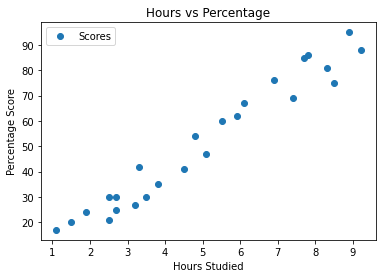

In [12]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, it is clear that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [107]:
X = s_data.drop(['Scores'], axis=1).values
Y = s_data['Scores'].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We can do this using Scikit-Learn's built-in train_test_split() method:

In [110]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [111]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  

regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [66]:
print(regressor.coef_, regressor.intercept_)

[9.91065648] 2.018160041434683


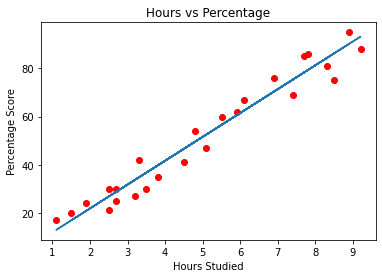

In [95]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y, color='red')
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### **Time for Predictions**
**Now that we have trained our algorithm, lets do some predictions.**

In [118]:
print(X_test)# Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [120]:

y_pred = regressor.predict(X_test) # Predicting the scores
y_pred # Display Predicted scores

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [115]:
# Comparing Actual vs Predicted
df = pd.DataFrame({"Actual Scores": y_test, "Predicted Scores": y_pred})  
df 

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [103]:
# Test with other data
hours = 9.25
pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [104]:
from sklearn.metrics import mean_squared_error
print("Mean Square Error", mean_squared_error(y_test,y_pred))

Mean Square Error 21.5987693072174


## Thank You